In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
sns.set_theme(context='talk', style="whitegrid")

data = pd.read_csv(r"diary_entries.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Timestamp                                                                            297 non-null    object
 1   Participant Id                                                                       297 non-null    int64 
 2   Which chat applications did you search in?                                           297 non-null    object
 3   Can you share the query text you typed in your chat application Search Textbox?      224 non-null    object
 4   What was your search intent when issuing this query to search your historical chat?  297 non-null    object
 5   What chat objects satisfied your search intents when you used the search function?   297 non-null  

In [6]:
cols = {'Participant Id':'Id',
                     'Which chat applications did you search in?':'Applications',
                     'Can you share the query text you typed in your chat application Search Textbox?':'Query',
                     'What was your search intent when issuing this query to search your historical chat?':'Search Intent', 
                     'What chat objects satisfied your search intents when you used the search function?':'Chat Search Objects',
                     'How did you search your previous chat conversations?':'Search Methods',
                     'How were the results displayed when you performed this search? ':'Displayed Results',
                     'How satisfied were you with the results being displayed in that way?':'Result Display User Satisfaction',
                     'How satisfied were you with the quality of the search results?':'Search Quality',
                     "How satisfied were you with the chat applications search experience?":'Search Experience'
                     }
data.rename(columns=cols, inplace=True)
data[cols.values()]

,Id,Applications,Query,Search Intent,Chat Search Objects,Search Methods,Displayed Results,Result Display User Satisfaction,Search Quality,Search Experience
0,101,MS Teams,Searched by person's name,Assigned tasks to members,Thread of conversation,Manually e.g. scrolling up and down,"A list of individual messages, in chronologica...",7,7,0
1,101,MS Teams,Group chat name,Work / Social announcements,Thread of conversation,Manually e.g. scrolling up and down,"A list of individual messages, in chronologica...",7,7,0
2,101,MS Teams,Ctrl+F to search current location,"Entities (e.g. People, Brands, places, Movies)",Thread of conversation,Manually e.g. scrolling up and down,"A list of short segments from a conversation, ...",7,7,0
3,101,MS Teams,Person's name,Refresh memory about what was said/discussed,Text messages.,Manually e.g. scrolling up and down,"A list of individual messages, in chronologica...",7,7,0
4,101,MS Teams,Ctrl+F and typed a word to find messages withi...,Refresh memory about what was said/discussed,Thread of conversation,Keywords within a textbox,"A list of individual messages, in chronologica...",7,7,0
...,...,...,...,...,...,...,...,...,...,...
292,126,Slack,NaN,Work / Social announcements,Thread of conversation,Keywords within a textbox,"A list of individual messages, in chronologica...",6,6,0
293,126,Slack,NaN,Refresh memory about what was said/discussed,Thread of conversation,Natural language phrase/questions,"A list of individual messages, in relevance/be...",4,2,0
294,126,Slack,NaN,"Entities (e.g. People, Brands, places, Movies)",Text messages.,Natural language phrase/questions,"A list of individual messages, in relevance/be...",4,3,0
295,126,Slack,NaN,"Entities (e.g. People, Brands, places, Movies)",Thread of conversation,Natural language phrase/questions,"A list of individual messages, in relevance/be...",2,2,0


In [7]:
num_entries = len(data)

# Calculate average entries per participant (min, max, SD)
entries_per_participant = data['Id'].value_counts()
avg_entries_per_participant = entries_per_participant.mean()
min_entries_per_participant = entries_per_participant.min()
max_entries_per_participant = entries_per_participant.max()
std_entries_per_participant = entries_per_participant.std()

# Calculate average length of query
data['Query_Length'] = data['Query'].str.len()
avg_query_length = data['Query_Length'].mean()

# Create a table that breaks down entries by search intents
search_intent_table = data.groupby('Search Intent').agg(
    # query_example=('Query', 'first'),  # First query example for each intent
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_search_intents=('Id', 'size'),  # Number of search intents
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this search intent
).reset_index()

# Display the calculated metrics and the table
num_entries, avg_entries_per_participant, min_entries_per_participant, max_entries_per_participant, std_entries_per_participant, avg_query_length, search_intent_table.head()
latex_table_search_intent = search_intent_table.to_latex(index=False, float_format="%.2f")
latex_table_search_intent
search_intent_table, latex_table_search_intent


(                                    Search Intent  percent_of_total_entries  \
 0                       Assigned tasks to members                  8.754209   
 1  Entities (e.g. People, Brands, places, Movies)                 16.161616   
 2                              Question-answering                  3.703704   
 3    Refresh memory about what was said/discussed                 36.026936   
 4                                       Resources                 28.282828   
 5                     Work / Social announcements                  7.070707   
 
    num_search_intents  num_participants  
 0                  26                11  
 1                  48                14  
 2                  11                 5  
 3                 107                17  
 4                  84                15  
 5                  21                10  ,
 '\\begin{tabular}{lrrr}\n\\toprule\nSearch Intent & percent_of_total_entries & num_search_intents & num_participants \\\\\n\\midrule\nA

In [8]:
# Create a table that breaks down entries by Chat Search Objects
chat_object_table = data.groupby('Chat Search Objects').agg(
    # query_example=('Query', 'first'),  # First query example for each Chat Object
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_diary_entries=('Id', 'size'),  # Number of diary entries for each Chat Search Object
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this Chat Search Object
).reset_index()

# Generate the LaTeX code for the table
latex_table_chat_object = chat_object_table.to_latex(index=False, float_format="%.2f")
chat_object_table, latex_table_chat_object


(                                 Chat Search Objects  \
 0                                         A URL link   
 1                                         A document   
 2                  Multimedia (e.g. images, videos).   
 3  Names of people or channels/groups mentioned i...   
 4  Nothing relevant. Then searched for meeting na...   
 5  Specific keywords or phrases mentioned in the ...   
 6                                     Text messages.   
 7                             Thread of conversation   
 
    percent_of_total_entries  num_diary_entries  num_participants  
 0                  6.734007                 20                 9  
 1                 12.121212                 36                11  
 2                  4.713805                 14                 7  
 3                 10.437710                 31                 9  
 4                  0.336700                  1                 1  
 5                  7.407407                 22                10  
 6       

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2560365135.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




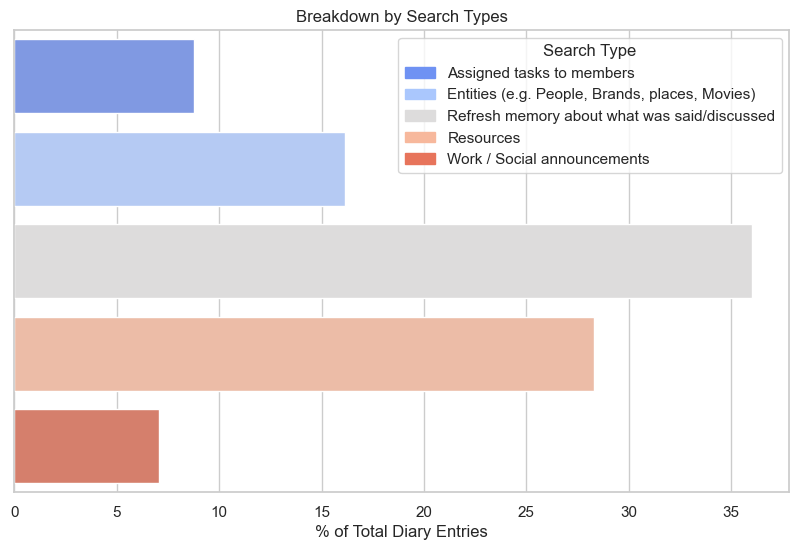

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2560365135.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




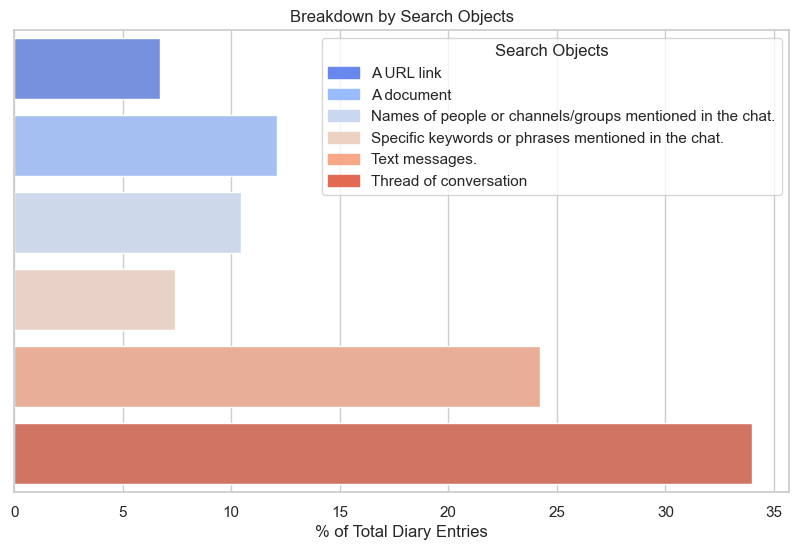

['search_intent_breakdown.csv', 'chat_object_breakdown.csv']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Set the style for the plots
sns.set(style="whitegrid")

# Create bar plots for the breakdown by Search Intents and Chat Search Objects

# Bar plot for Search Intents
search_intent_filtered_data = search_intent_table[search_intent_table['percent_of_total_entries'] >= 5]
plt.figure(figsize=(10, 6))
sns.barplot(x='percent_of_total_entries', y='Search Intent', data=search_intent_filtered_data, palette="coolwarm")
plt.title('Breakdown by Search Types')
plt.xlabel('% of Total Diary Entries')
# plt.ylabel('Search Intent')
plt.ylabel('')
plt.yticks([], [])
palette_colors = sns.color_palette("coolwarm", len(search_intent_filtered_data['Search Intent'].unique()))
legend_labels = [Patch(facecolor=palette_colors[i], edgecolor=palette_colors[i], label=label) 
                 for i, label in enumerate(search_intent_filtered_data['Search Intent'].unique())]

plt.legend(handles=legend_labels, title='Search Type', loc='upper right')
plt.show()
# plt.yticks(rotation=70)  # Rotate y-axis labels if there are more than 2 search intents

# Bar plot for Chat Search Objects
chat_object_filtered_data = chat_object_table[chat_object_table['percent_of_total_entries'] >= 5]
plt.figure(figsize=(10, 6))
sns.barplot(x='percent_of_total_entries', y='Chat Search Objects', data=chat_object_filtered_data, palette="coolwarm")
plt.title('Breakdown by Search Objects')
plt.xlabel('% of Total Diary Entries')
# plt.ylabel('Search Intent')
plt.ylabel('')
plt.yticks([], [])
palette_colors = sns.color_palette("coolwarm", len(chat_object_filtered_data['Chat Search Objects'].unique()))
legend_labels = [Patch(facecolor=palette_colors[i], edgecolor=palette_colors[i], label=label) 
                 for i, label in enumerate(chat_object_filtered_data['Chat Search Objects'].unique())]

plt.legend(handles=legend_labels, title='Search Objects', loc='upper right')
plt.show()


# Export the tables to CSV files
search_intent_table.to_csv('search_type_breakdown.csv', index=False)
chat_object_table.to_csv('chat_object_breakdown.csv', index=False)

# Return paths to the exported CSV files
exported_files = ['search_intent_breakdown.csv', 'chat_object_breakdown.csv']
exported_files


/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2418243042.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




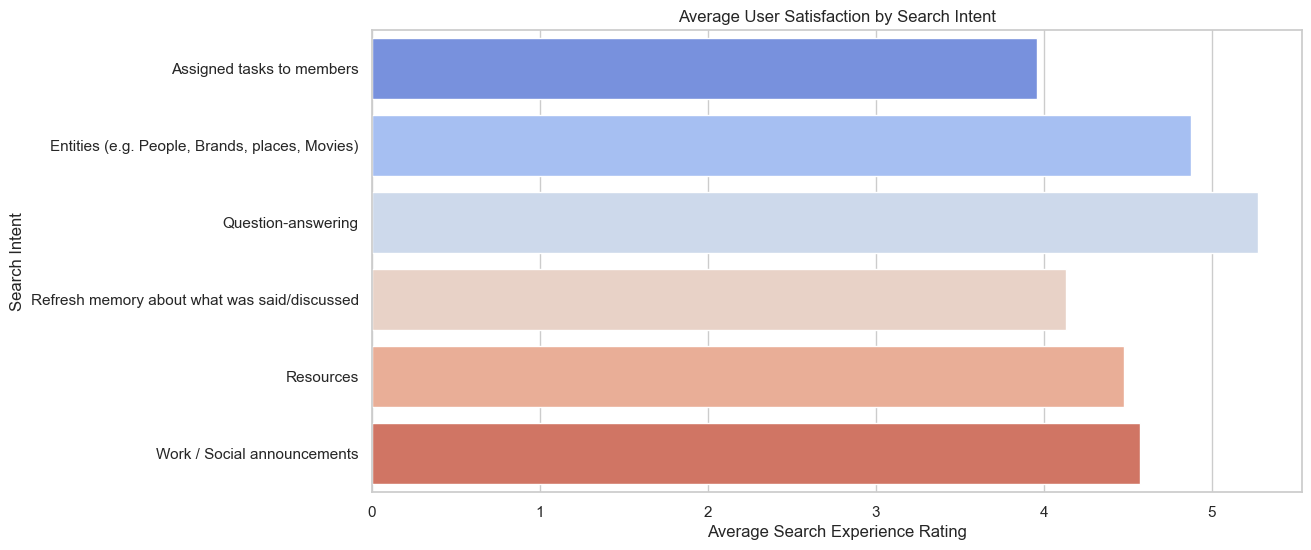

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2418243042.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




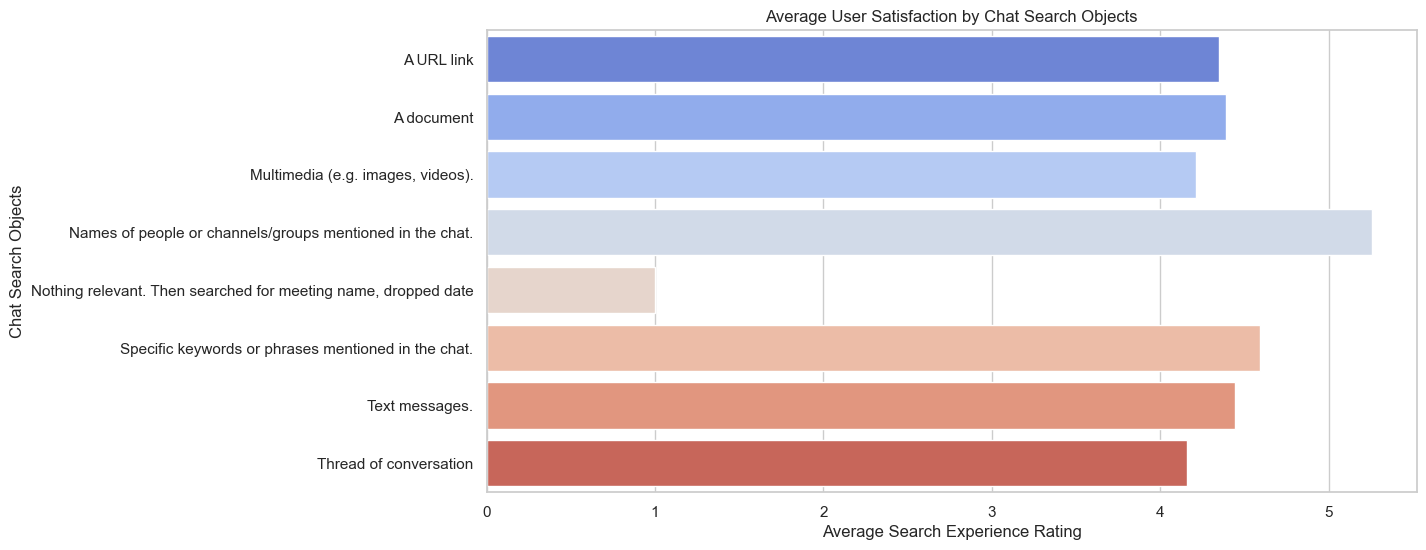

(                                    Search Intent  avg_search_quality
 0                       Assigned tasks to members            3.961538
 1  Entities (e.g. People, Brands, places, Movies)            4.875000
 2                              Question-answering            5.272727
 3    Refresh memory about what was said/discussed            4.130841
 4                                       Resources            4.476190
 5                     Work / Social announcements            4.571429,
                                  Chat Search Objects  avg_search_quality
 0                                         A URL link            4.350000
 1                                         A document            4.388889
 2                  Multimedia (e.g. images, videos).            4.214286
 3  Names of people or channels/groups mentioned i...            5.258065
 4  Nothing relevant. Then searched for meeting na...            1.000000
 5  Specific keywords or phrases mentioned in the ...     

In [10]:
# User Satisfaction Analysis: Breakdown by Search Intents and Chat Search Objects

# Average User Satisfaction by Search Intent
avg_satisfaction_by_intent = data.groupby('Search Intent').agg(
    # avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    # avg_search_experience=('Search Experience', 'mean')
).reset_index()
# df.groupby('A').B.agg(['min', 'max'])
# Average User Satisfaction by Chat Search Objects
avg_satisfaction_by_object = data.groupby('Chat Search Objects').agg(
    # avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    # avg_search_experience=('Search Experience', 'mean')
).reset_index()

# Create bar plots for Average User Satisfaction by Search Intents and Chat Search Objects

# Bar plot for Average User Satisfaction by Search Intent
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_quality', y='Search Intent', data=avg_satisfaction_by_intent, palette="coolwarm")
plt.title('Average User Satisfaction by Search Intent')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Search Intent')
plt.show()

# Bar plot for Average User Satisfaction by Chat Search Objects
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_quality', y='Chat Search Objects', data=avg_satisfaction_by_object, palette="coolwarm")
plt.title('Average User Satisfaction by Chat Search Objects')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Chat Search Objects')
plt.show()

# Export the tables to CSV files
avg_satisfaction_by_intent.to_csv('avg_satisfaction_by_intent.csv', index=False)
avg_satisfaction_by_object.to_csv('avg_satisfaction_by_object.csv', index=False)

# Return paths to the exported CSV files
exported_satisfaction_files = ['avg_satisfaction_by_intent.csv', 'avg_satisfaction_by_object.csv']
avg_satisfaction_by_intent, avg_satisfaction_by_object, exported_satisfaction_files


/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/3835217148.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




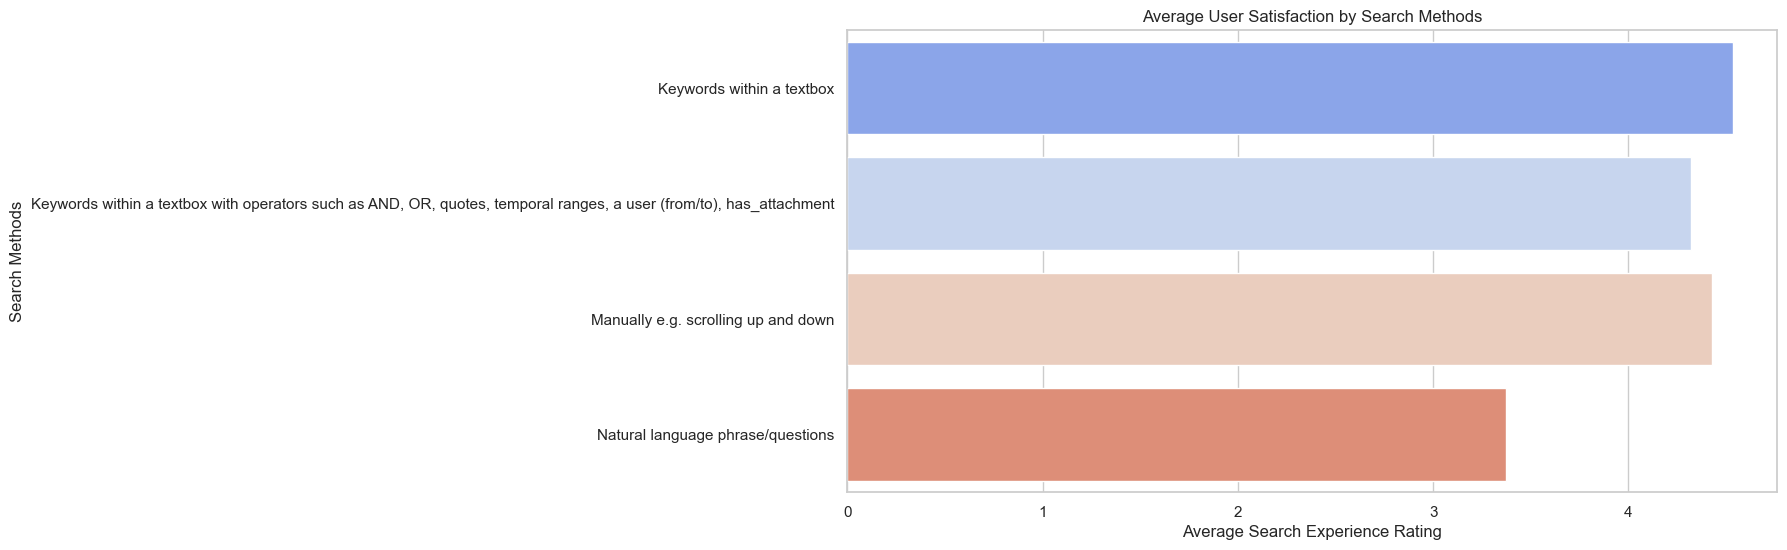

(                                      Search Methods  \
 0                          Keywords within a textbox   
 1  Keywords within a textbox with operators such ...   
 2                Manually e.g. scrolling up and down   
 3                  Natural language phrase/questions   
 
    percent_of_total_entries  num_diary_entries  num_participants  
 0                 42.760943                127                16  
 1                  9.427609                 28                 7  
 2                 42.424242                126                17  
 3                  5.387205                 16                 5  ,
 '\\begin{tabular}{lrrr}\n\\toprule\nSearch Methods & percent_of_total_entries & num_diary_entries & num_participants \\\\\n\\midrule\nKeywords within a textbox & 42.76 & 127 & 16 \\\\\nKeywords within a textbox with operators such as AND, OR, quotes, temporal ranges, a user (from/to), has_attachment & 9.43 & 28 & 7 \\\\\nManually e.g. scrolling up and down & 42.42 & 12

In [11]:
# # Generate synthetic data for demonstration, assuming the re-upload of the data file
# import numpy as np
# import pandas as pd

# # Random data generation for demonstration
# np.random.seed(0)
# data = pd.DataFrame({
#     'Search Methods': np.random.choice(['Method A', 'Method B', 'Method C'], 100),
#     'Result Display User Satisfaction': np.random.randint(1, 6, 100),
#     'Search Quality': np.random.randint(1, 6, 100),
#     'Search Experience': np.random.randint(1, 6, 100),
#     'Id': np.arange(1, 101),
#     'Query': np.random.choice(['Query 1', 'Query 2', 'Query 3'], 100)
# })

# # Create the table as done previously
# num_entries = len(data)
# search_method_table = data.groupby('Search Methods').agg(
#     query_example=('Query', 'first'),
#     percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),
#     num_diary_entries=('Id', 'size'),
#     num_participants=('Id', 'nunique')
# ).reset_index()

# # Calculate average satisfaction by method
# avg_satisfaction_by_method = data.groupby('Search Methods').agg(
#     avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
#     avg_search_quality=('Search Quality', 'mean'),
#     avg_search_experience=('Search Experience', 'mean')
# ).reset_index()

# Create the bar plot
# plt.figure(figsize=(12, 6))
# sns.barplot(x='avg_search_quality', y='Search Methods', data=avg_satisfaction_by_method, hue='Search Methods', dodge=False)
# plt.title('Average User Satisfaction by Search Methods')
# plt.xlabel('Average Search Experience Rating')
# plt.ylabel('Search Methods')
# plt.legend(title='Search Methods', loc='lower right')
# plt.show()
# # Calculate the number of entries for the lambda function
num_entries = len(data)

# Create a table that breaks down entries by Search Methods
search_method_table = data.groupby('Search Methods').agg(
    # query_example=('Query', 'first'),  # First query example for each Search Method
    percent_of_total_entries=('Id', lambda x: (len(x) / num_entries) * 100),  # % of total diary entries
    num_diary_entries=('Id', 'size'),  # Number of diary entries for each Search Method
    num_participants=('Id', 'nunique')  # Number of unique participants reporting this Search Method
).reset_index()

# Generate the LaTeX code for the table
latex_table_search_method = search_method_table.to_latex(index=False, float_format="%.2f")

# Create a bar plot for Average User Satisfaction by Search Methods
avg_satisfaction_by_method = data.groupby('Search Methods').agg(
    # avg_result_display_satisfaction=('Result Display User Satisfaction', 'mean'),
    avg_search_quality=('Search Quality', 'mean'),
    # avg_search_experience=('Search Experience', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_search_quality', y='Search Methods', data=avg_satisfaction_by_method, palette="coolwarm")
plt.title('Average User Satisfaction by Search Methods')
plt.xlabel('Average Search Experience Rating')
plt.ylabel('Search Methods')
plt.show()

# Export the tables to CSV files
search_method_table.to_csv('search_method_breakdown.csv', index=False)
avg_satisfaction_by_method.to_csv('avg_satisfaction_by_method.csv', index=False)

# Return paths to the exported CSV files
exported_method_files = ['search_method_breakdown.csv', 'avg_satisfaction_by_method.csv']
search_method_table.head(), latex_table_search_method, exported_method_files


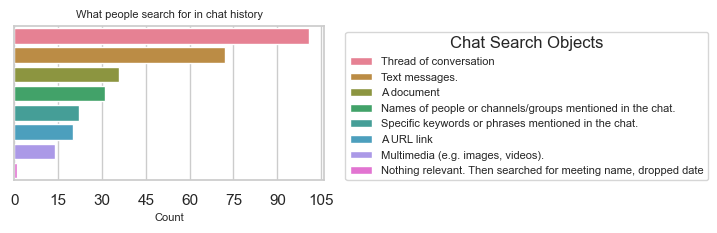

In [12]:


# Chat_Search_Objects = data['Chat Search Objects'].str.split(';', expand=True).stack().value_counts()
# ax = sns.barplot(x=Chat_Search_Objects.index, y=Chat_Search_Objects.values)
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # sns.barplot(x=Applications_counts.index, y=Applications_counts.values)
# plt.xticks(rotation=90,fontsize=9)
# plt.xlabel('Chat Search Objects', fontsize=10)
# plt.ylabel('Count')
# plt.title('What people search for in chat history')
# plt.show()

Chat_Search_Objects = data['Chat Search Objects'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots(figsize=(4,2))

# Plot each bar individually and add it to the legend, using a unique color for each
colors = sns.color_palette('husl', len(Chat_Search_Objects))
for i, (index, value) in enumerate(Chat_Search_Objects.items()):
    sns.barplot(x=[value], y=[i], ax=ax, label=index, color=colors[i], orient='h',)

# X-axis settings
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Count', fontsize=8)

# Remove y-ticks and y-labels
ax.set_yticks([])
ax.set_ylabel('')

# Title
plt.title('What people search for in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Chat Search Objects', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)

# Show the plot
plt.show()




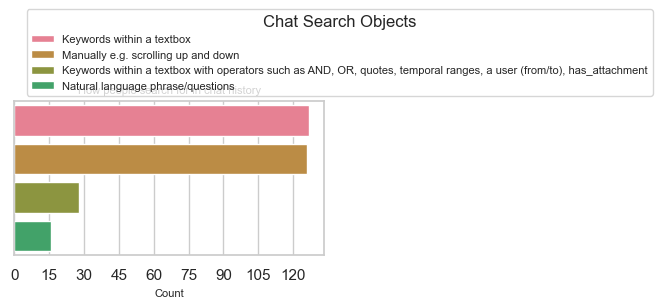

In [13]:


Search_Methods = data['Search Methods'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots(figsize=(4,2))

# Plot each bar individually and add it to the legend, using a unique color for each
colors = sns.color_palette('husl', len(Chat_Search_Objects))
for i, (index, value) in enumerate(Search_Methods.items()):
    sns.barplot(x=[value], y=[i], ax=ax, label=index, color=colors[i], orient='h')

# X-axis settings
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Count', fontsize=8)

# Remove y-ticks and y-labels
ax.set_yticks([])
ax.set_ylabel('')

# Title
plt.title('How people search for in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Chat Search Objects', bbox_to_anchor=(1.05, 1), loc=8,fontsize=8)

# Show the plot
plt.show()



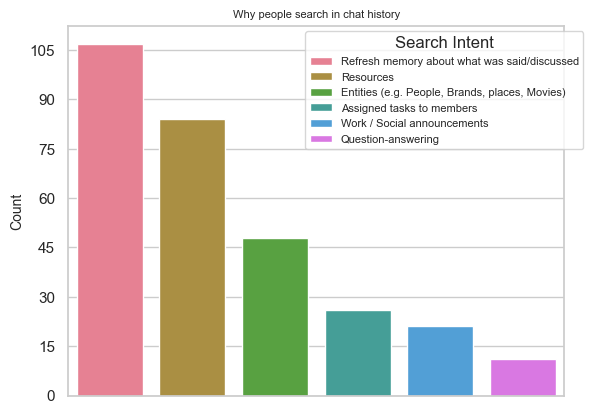

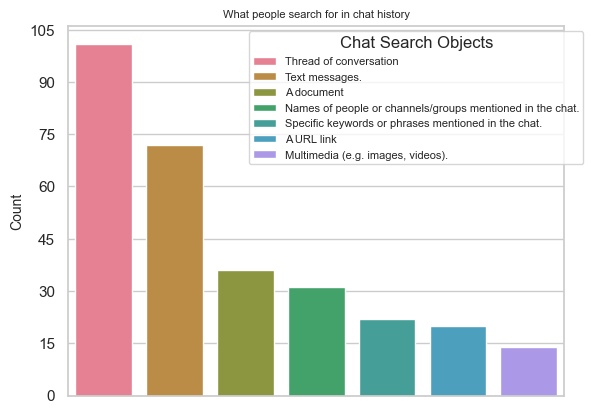

In [14]:
# Search_Intent = data['Search Intent'].str.split(';', expand=True).stack().value_counts()
# ax = sns.barplot(x=Search_Intent.index, y=Search_Intent.values)
# ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # sns.barplot(x=Applications_counts.index, y=Applications_counts.values)
# plt.xticks(rotation=90)
# plt.xlabel('Search Intent')
# plt.ylabel('Count')
# plt.title('Why people usually search through chat Apps')
# plt.show()

Search_Intent = data['Search Intent'].str.split(';', expand=True).stack().value_counts()

# Create an empty plot
fig, ax = plt.subplots()

# Plot each bar individually and add it to the legend
colors = sns.color_palette('husl', len(Search_Intent))
for i, (index, value) in enumerate(Search_Intent.items()):
    sns.barplot(x=[i], y=[value], ax=ax, label=index, color=colors[i])
# Remove x-ticks and x-labels
ax.set_xticks([])
ax.set_xlabel('')

# Y-axis settings
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Count', fontsize=10)

# Title
plt.title('Why people search in chat history', fontsize=8)

# Add a legend with a title
plt.legend(title='Search Intent', bbox_to_anchor=(1.05, 1), loc=0, fontsize=8)

# Show the plot
plt.show()

Chat_Search_Objects = data['Chat Search Objects'].str.split(';', expand=True).stack().value_counts()

# # Create an empty plot
# fig, ax = plt.subplots(figsize=(4,2))
fig, ax = plt.subplots()

# Plot each bar individually and add it to the legend, using a unique color for each
colors = sns.color_palette('husl', len(Chat_Search_Objects))
for i, (index, value) in enumerate(Chat_Search_Objects.items()):
    if value > 1:
        sns.barplot(x=[i], y=[value], ax=ax, label=index, color=colors[i])

# # Remove y-ticks and y-labels
ax.set_xticks([])
ax.set_xlabel('')

# Y-axis settings
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Count', fontsize=10)




# # Title
plt.title('What people search for in chat history', fontsize=8)

# # Add a legend with a title
plt.legend(title='Chat Search Objects', bbox_to_anchor=(1.05, 1), loc=0,fontsize=8)

# # Show the plot
plt.show()



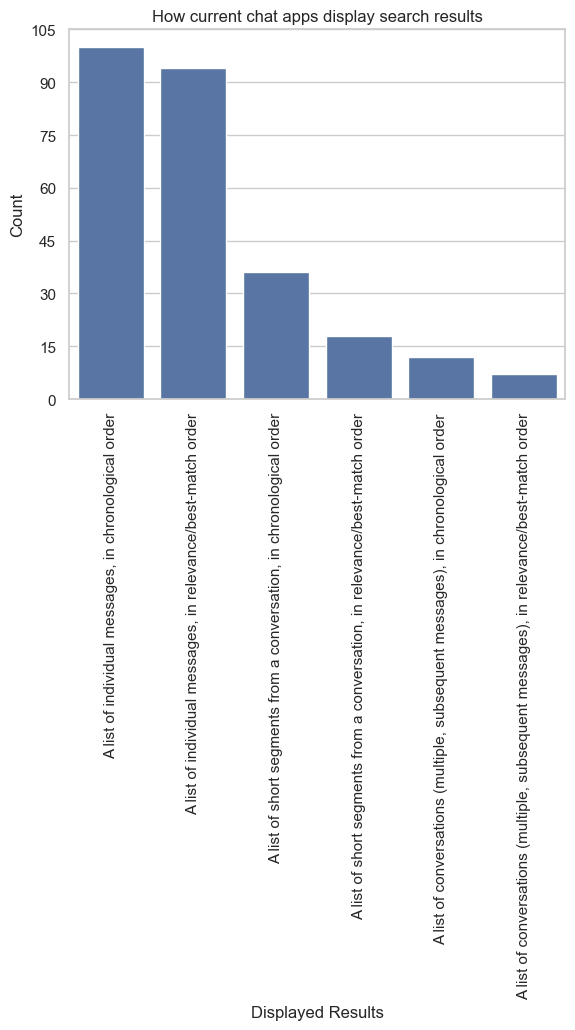

In [15]:
Displayed_Results = data['Displayed Results'].str.split(';', expand=True).stack().value_counts()
Filtered_Displayed_Results = Displayed_Results[Displayed_Results > 4]
y = Displayed_Results.values
ax = sns.barplot(x=Filtered_Displayed_Results.index, y=Filtered_Displayed_Results.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Displayed Results')
plt.ylabel('Count')
plt.title('How current chat apps display search results')
plt.show()

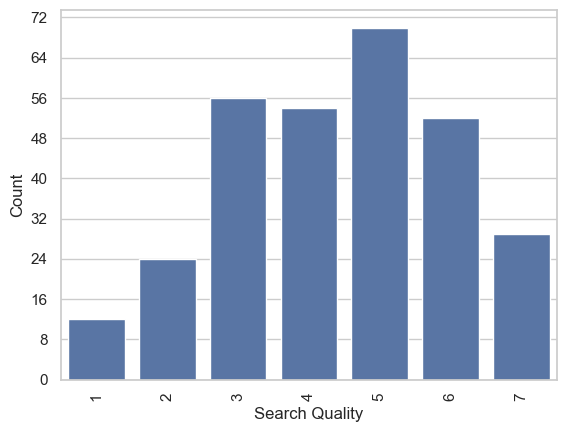

In [16]:
Search_Quality = data['Search Quality'].value_counts()
ax = sns.barplot(x=Search_Quality.index, y=Search_Quality.values)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.xlabel('Search Quality')
plt.ylabel('Count')
plt.title('')
plt.show()

In [17]:
pip install -U kaleido

Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl (85.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import plotly.express as px

# Load the CSV file into a DataFrame
df = pd.read_csv('diary_entries.csv')
search_intent_unique = df['What was your search intent when issuing this query to search your historical chat?'].unique()
chat_object_unique = df['What chat objects satisfied your search intents when you used the search function?'].unique()

# Show the first few rows to understand its structure
# df.head()
# # Create mappings for encoding
search_intent_map = {k: string.ascii_uppercase[i] for i, k in enumerate(search_intent_unique)}
chat_object_map = {k: i+1 for i, k in enumerate(chat_object_unique)}
# Create a table for the encoded Search Intent labels
encoded_search_intent_table = pd.DataFrame({
    'Original Search Intent': list(search_intent_map.keys()),
    'Search Intent': list(search_intent_map.values())
})

# Create a table for the encoded Chat Object labels
encoded_chat_object_table = pd.DataFrame({
    'Original Chat Object': list(chat_object_map.keys()),
    'Chat Object': list(chat_object_map.values())
})
# Count and filter 'Chat Object' with less than 2 occurrences
chat_object_counts = df['What chat objects satisfied your search intents when you used the search function?'].value_counts()
valid_chat_objects = chat_object_counts[chat_object_counts >= 15].index

# Filter the DataFrame to include only valid 'Chat Object'
df_filtered = df[df['What chat objects satisfied your search intents when you used the search function?'].isin(valid_chat_objects)]

# Apply encoding to your DataFrame
df_filtered['Search Intent'] = df_filtered['What was your search intent when issuing this query to search your historical chat?'].map(search_intent_map)
df_filtered['Chat Object'] = df_filtered['What chat objects satisfied your search intents when you used the search function?'].map(chat_object_map)
# 



# Custom color scale

fig = px.parallel_categories(df_filtered, dimensions=['Search Intent', 'Chat Object'])

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    width=600,  # Set the width
    height=300  # Set the height
)

fig.show()
fig.write_image("fig1.pdf")

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2311005169.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/2311005169.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ismailsabei/opt/anaconda3/envs/pyserini_2/lib/python3.10/site-packages/plotly/express/_core.py:1901: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `

AttributeError: 'DataFrame' object has no attribute 'iteritems'

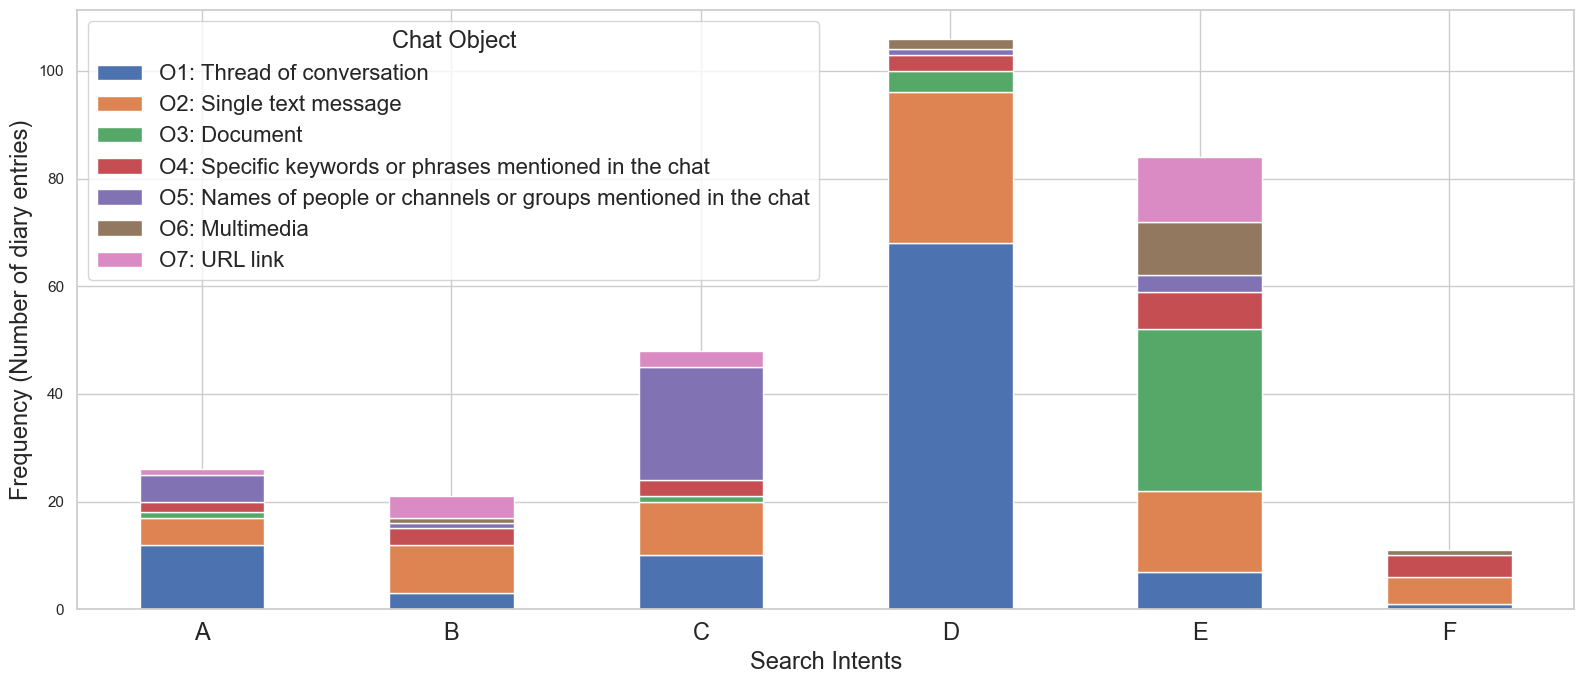

/Users/ismailsabei/opt/anaconda3/envs/pyserini_2/lib/python3.10/site-packages/plotly/express/_core.py:1901: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import plotly.express as px

# Load the CSV file into a DataFrame
df = pd.read_csv('diary_entries.csv')
search_intent_unique = df['What was your search intent when issuing this query to search your historical chat?'].unique()
chat_object_unique = df['What chat objects satisfied your search intents when you used the search function?'].unique()

# Create mappings for encoding
search_intent_map = {k: string.ascii_uppercase[i] for i, k in enumerate(search_intent_unique)}
chat_object_map = {k: i+1 for i, k in enumerate(chat_object_unique) }

chat_object_counts = df['What chat objects satisfied your search intents when you used the search function?'].value_counts()
valid_chat_objects = chat_object_counts[chat_object_counts >= 10].index

search_intent_counts = df['What was your search intent when issuing this query to search your historical chat?'].value_counts()
valid_search_intents = search_intent_counts[search_intent_counts>=10].index
# Filter the DataFrame to include only valid 'Chat Object'

df_filtered = df[df['What chat objects satisfied your search intents when you used the search function?'].isin(valid_chat_objects)]

# Apply encoding to your DataFrame
df['Search Intent'] = df_filtered['What was your search intent when issuing this query to search your historical chat?'].map(search_intent_map)
df['Chat Object'] = df_filtered['What chat objects satisfied your search intents when you used the search function?'].map(chat_object_map)
agg_data = df.groupby(['Search Intent', 'Chat Object']).size().unstack(fill_value=0)

# Set the visual style
sns.set_style("whitegrid")
CO = ['O1: Thread of conversation','O2: Single text message','O3: Document','O4: Specific keywords or phrases mentioned in the chat','O5: Names of people or channels or groups mentioned in the chat','O6: Multimedia','O7: URL link']
# Plot
agg_data.plot(kind='bar', stacked=True, figsize=(16, 7))
# plt.title('Interaction between Search Intent and Chat Object')
plt.xlabel('Search Intents', fontsize=17)
plt.ylabel('Frequency (Number of diary entries)', fontsize=17)
plt.xticks(rotation=0, fontsize=17)
plt.legend(title='Chat Object', #loc=0,
            loc="upper left",
            #bbox_to_anchor=(0.515, .5), 
           fontsize=16, title_fontsize=17,labels=CO) 
plt.tight_layout()

plt.savefig('/Users/ismailsabei/phd-ismail/sigir2024-conversations-search-behaviour/figures/inter_CO_SI.pdf', dpi=1000, bbox_inches='tight')

# Show plot
plt.show()

search_type_numeric_map = {v: i for i, v in enumerate(search_intent_map.values())}
df['Search Type Numeric'] = df['Search Intent'].map(search_type_numeric_map)

fig = px.parallel_categories(df, dimensions=['Search Intent', 'Chat Object',], color='Search Type Numeric')

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    width=500,  # Set the width
    height=300  # Set the height
)
fig.show()
# labels=[i for i in range(1, len(chat_object_unique)+1)]


In [20]:
import pandas as pd
import plotly.express as px
import string

# Load the CSV file into a DataFrame
df = pd.read_csv('diary_entries.csv')

# Identifying unique values
search_intent_unique = df['What was your search intent when issuing this query to search your historical chat?'].unique()
chat_object_unique = df['What chat objects satisfied your search intents when you used the search function?'].unique()

# Create mappings for encoding
search_intent_map = {k: string.ascii_uppercase[i] for i, k in enumerate(search_intent_unique)}
chat_object_map = {k: i+1 for i, k in enumerate(chat_object_unique)}

# Counting and filtering valid entries
chat_object_counts = df['What chat objects satisfied your search intents when you used the search function?'].value_counts()
valid_chat_objects = chat_object_counts[chat_object_counts >= 10].index

search_intent_counts = df['What was your search intent when issuing this query to search your historical chat?'].value_counts()
valid_search_intents = search_intent_counts[search_intent_counts >= 10].index

# Filtering the DataFrame
df_filtered = df[df['What chat objects satisfied your search intents when you used the search function?'].isin(valid_chat_objects) &
                 df['What was your search intent when issuing this query to search your historical chat?'].isin(valid_search_intents)]

# Applying encoding
df_filtered['Encoded Search Intent'] = df_filtered['What was your search intent when issuing this query to search your historical chat?'].map(search_intent_map)
df_filtered['Encoded Chat Object'] = df_filtered['What chat objects satisfied your search intents when you used the search function?'].map(chat_object_map)

# Grouping and aggregating data for plotting
agg_data = df_filtered.groupby(['Encoded Search Intent', 'Encoded Chat Object']).size().reset_index(name='Count')

# Create interaction pillar plot
fig = px.bar(agg_data, x='Encoded Search Intent', y='Count', color='Encoded Chat Object', barmode='group',
             labels={
                 "Encoded Search Intent": "Search Intent",
                 "Encoded Chat Object": "Chat Object",
                 "Count": "Number of Entries"
             },
             title="Interaction between Search Intent and Chat Object")

# Show the plot
fig.show()

# Optionally save the figure
fig.write_image("inter_CO_SI.pdf", scale=3)


/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/3503329880.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m0/2w32g6m94nj8jh3jk6ws1wd40000gn/T/ipykernel_48866/3503329880.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    /Users/ismailsabei/opt/anaconda3/envs/pyserini_2/bin
    /opt/homebrew/opt/openjdk/bin
    /Users/ismailsabei/opt/anaconda3/envs/pyserini_2/bin
    /Users/ismailsabei/opt/anaconda3/condabin
    /opt/homebrew/bin
    /opt/homebrew/sbin
    /usr/local/bin
    /System/Cryptexes/App/usr/bin
    /usr/bin
    /bin
    /usr/sbin
    /sbin
    /var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin
    /var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin
    /var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin
    /Library/TeX/texbin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
# Load your data
df = pd.read_csv('diary_entries.csv')

# Specify the relevant columns
search_intent_column = 'What was your search intent when issuing this query to search your historical chat?'
chat_object_column = 'What chat objects satisfied your search intents when you used the search function?'

# Aggregate the data
agg_df = df.groupby([search_intent_column, chat_object_column]).size().reset_index(name='Count')
print(agg_df)
# Create lists for source, target and value
source = []
target = []
value = []

# Create mappings for nodes
search_intent_labels = agg_df[search_intent_column].unique()
chat_object_labels = agg_df[chat_object_column].unique()
label_list = list(search_intent_labels) + list(chat_object_labels)

# Populate source, target, and value lists
for index, row in agg_df.iterrows():
    if row['Count'] < 10:
        continue
    source.append(label_dict[row[search_intent_column]])
    target.append(label_dict[row[chat_object_column]])
    value.append(row['Count'])

# Generate colors for the nodes
search_intent_colors = px.colors.qualitative.Plotly[:len(search_intent_labels)]
chat_object_colors = px.colors.qualitative.D3[:len(chat_object_labels)]
node_colors = search_intent_colors + chat_object_colors

# Create Sankey diagram with different colors
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=node_colors  # Set node colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 
               'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)', 
               'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)', 
               'rgba(23, 190, 207, 0.8)'] * (len(value) // 10 + 1)  # Set link colors, repeating pattern if necessary
    )
)])

fig.update_layout(font_size=12, width=800, height=600)
fig.update_legends(font_size=12, traceorder='reversed', title_font_size=14, title_text='Nodes',   y=0.5, x=1.1, bordercolor='Black', borderwidth=1, bgcolor='White', tracegroupgap=10, orientation='h')

# Save the figure as a high-quality PDF
fig.write_image("sankey_diagram.pdf", format="pdf", engine="kaleido", scale=3)
# Optionally, display the plot
fig.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
   What was your search intent when issuing this query to search your historical chat?  \
0                           Assigned tasks to members                                    
1                           Assigned tasks to members                                    
2                           Assigned tasks to members                                    
3                           Assigned tasks to members                                    
4                           Assigned tasks to memb

NameError: name 'label_dict' is not defined

Bucketed Data Overview:
               Bucket  Count
0     Lower Precision     20
1  Moderate Precision    122
2    Higher Precision     82


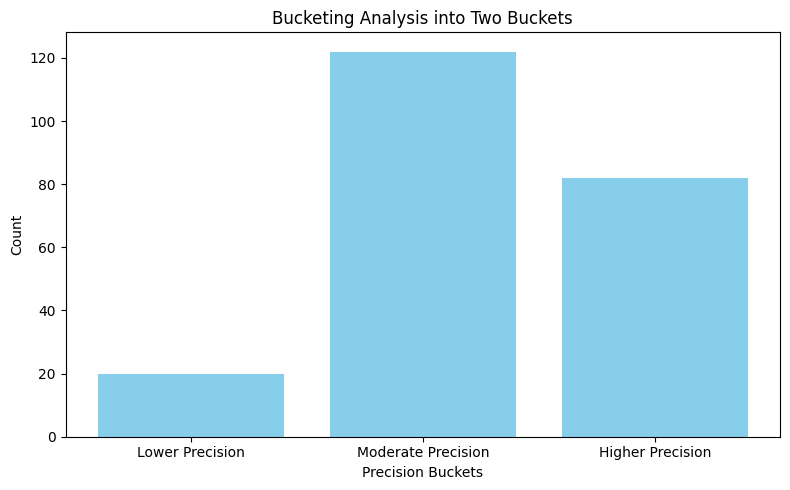

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories and their values
data = {
    'Category': [
        'Much lower precision', 
        'Slightly lower precision', 
        'Moderate precision', 
        'Slightly higher precision', 
        'Much higher precision'
    ],
    'Count': [4, 16, 122, 71, 11]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create two buckets
buckets = {
    'Lower Precision': df[df['Category'].isin(['Much lower precision', 'Slightly lower precision'])]['Count'].sum(),
    'Moderate Precision': df[df['Category'] == 'Moderate precision']['Count'].sum(),
    'Higher Precision': df[df['Category'].isin(['Slightly higher precision', 'Much higher precision'])]['Count'].sum()
}

# Create a new DataFrame for the buckets
bucket_df = pd.DataFrame(list(buckets.items()), columns=['Bucket', 'Count'])

# Print the bucketed DataFrame
print("Bucketed Data Overview:")
print(bucket_df)

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(bucket_df['Bucket'], bucket_df['Count'], color='skyblue')
plt.xlabel('Precision Buckets')
plt.ylabel('Count')
plt.title('Bucketing Analysis into Two Buckets')
plt.tight_layout()

# Display the plot
plt.show()


                  Feature  Not Useful  Moderately useful  Very useful
0    Context-based search        13.6               27.7         58.6
1                 Tagging        20.0               28.6         51.4
2         Advanced Search        12.7               23.6         63.6
3       Multimedia Search        18.6               29.1         52.3
4  Conversation Retrieval        12.7               30.5         56.8


ConversionError: Failed to convert value(s) to axis units: Index(['Feature', 'Not Useful', 'Moderately useful', 'Very useful'], dtype='object')

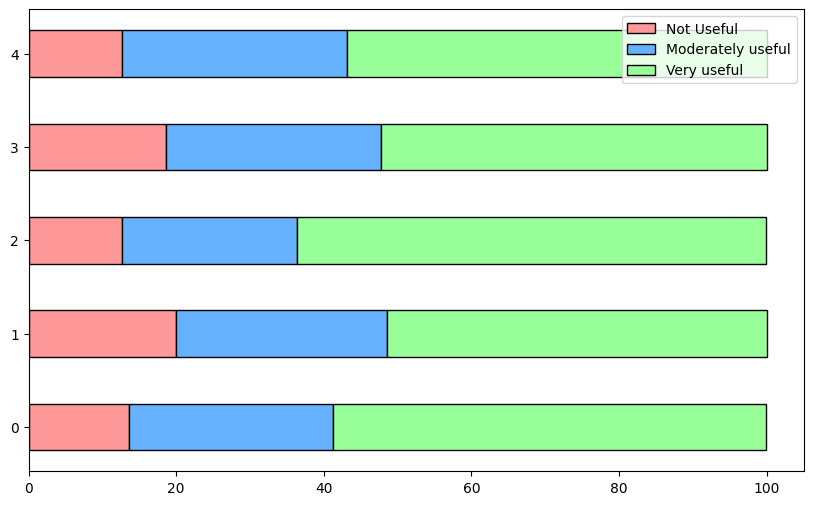

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories and their values
statements = {
    "Context-based search": "Context-based search: This allows you to use phrases with similar meanings to the chat contents to find what you're looking for, even if the exact words don't match.",
    "Tagging": "Tagging: You can assign keywords or descriptions to messages or conversations, making them easier to recall and find in future searches.",
    "Advanced Search": "Advanced Search: This feature lets you set search constraints, like a time window, returning results only from your defined start (X) to end (Y) periods. It also supports logical operators (e.g., AND, OR) for sender names, message content, and keywords, allowing precise and flexible searches.",
    "Multimedia Search": "Multimedia Search: This feature would enable you to search for non-text content, such as images or audio, within your chats.",
    "Conversation Retrieval": "Conversation Retrieval: This feature enables you to access entire conversations for complete context, eliminating the need to piece together unrelated individual messages or segments."
}

data = {
    "Feature": list(statements.keys()),
    "Not Useful": [13.6,20,12.7,18.6,12.7],
    "Moderately useful": [27.7, 28.6, 23.6, 29.1, 30.5],
    "Very useful": [58.6,51.4,63.6,52.3,56.8],
    
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

plt = df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF', '#99FF99'], edgecolor='black',xlabel='Percentage of Participants', ylabel='Feature', title='User Satisfaction with Different Search Features',legend=True,fontsize=10,yticks=df.columns, xticks=[0, 20, 40, 60, 80, 100])
# plt.title('User Satisfaction with Different Search Features')


# Plot the data



In [64]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
df = pd.read_csv('diary_entries.csv')

# Specify the relevant columns
search_intent_column = 'What was your search intent when issuing this query to search your historical chat?'
chat_object_column = 'What chat objects satisfied your search intents when you used the search function?'

lower_values = []
lower_values2 = []

for i in df[search_intent_column]:
    lower_values.append(i.lower())

df.loc[:, search_intent_column] = lower_values

for i in df[chat_object_column]:
    if i == "URL link":
        lower_values2.append("URL link")
    else:
        lower_values2.append(i.lower())
    

df.loc[:, chat_object_column] = lower_values2

df.head()

# Aggregate the data
agg_df = df.groupby([search_intent_column, chat_object_column]).size().reset_index(name='Count')

# Create lists for source, target and value
source = []
target = []
value = []

# Create mappings for nodes
label_list = pd.concat([agg_df[search_intent_column], agg_df[chat_object_column]]).unique()
label_dict = {label: i for i, label in enumerate(label_list)}

# Populate source, target, and value lists
for index, row in agg_df.iterrows():
    if row['Count'] <10:
        continue
    source.append(label_dict[row[search_intent_column]])
    target.append(label_dict[row[chat_object_column]])
    value.append(row['Count'])



# Generate colors for the nodes
colors = ['#'+format(i, '06x') for i in range(len(label_list))]

# Create Sankey diagram with different colors
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=35,
        label=label_list
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=['rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 
               'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)', 
               'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)', 
               'rgba(23, 190, 207, 0.8)'] * (len(value) // 10 + 1)  # Set link colors, repeating pattern if necessary
    )
)])

fig.update_layout(title_text="", font_size=15, width=800, height=600, margin=dict(l=0, r=0, t=0, b=0), plot_bgcolor='rgba(256,256,256,256)')
fig.show()


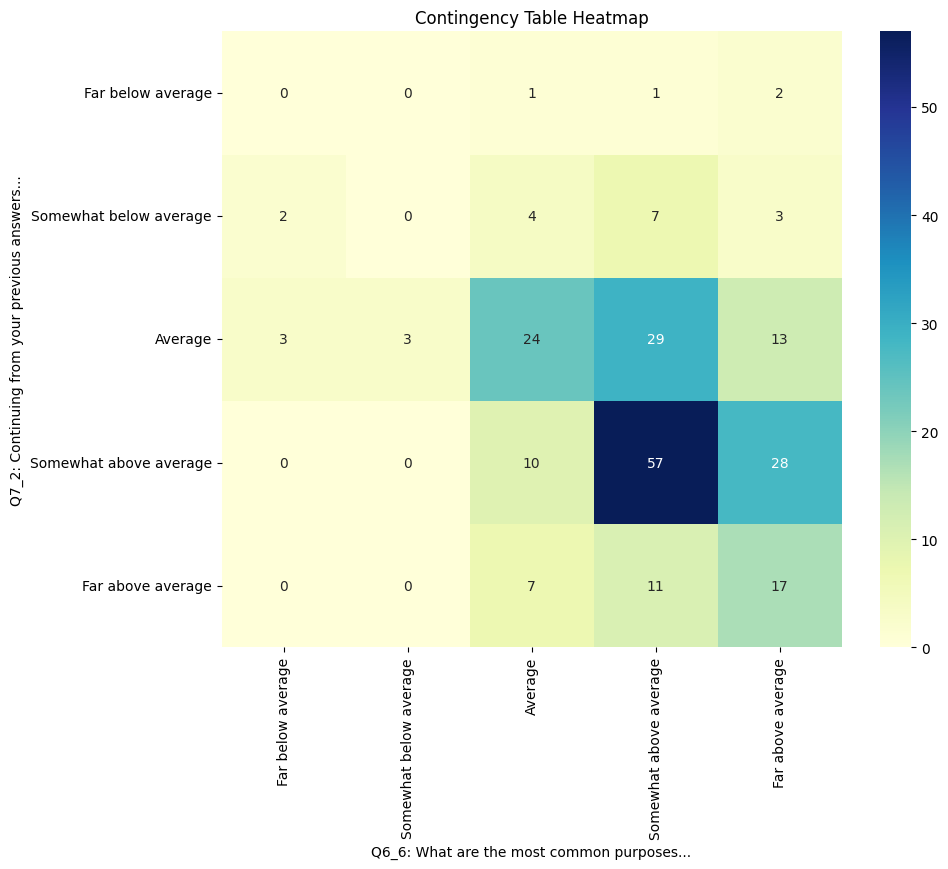

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the contingency table
data = {
    'Far below average': [0, 2, 3, 0, 0],
    'Somewhat below average': [0, 0, 3, 0, 0],
    'Average': [1, 4, 24, 10, 7],
    'Somewhat above average': [1, 7, 29, 57, 11],
    'Far above average': [2, 3, 13, 28, 17],
}

index = ['Far below average', 'Somewhat below average', 'Average', 'Somewhat above average', 'Far above average']
contingency_table = pd.DataFrame(data, index=index)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Contingency Table Heatmap")
plt.xlabel("Q6_6: What are the most common purposes...")
plt.ylabel("Q7_2: Continuing from your previous answers...")
plt.show()


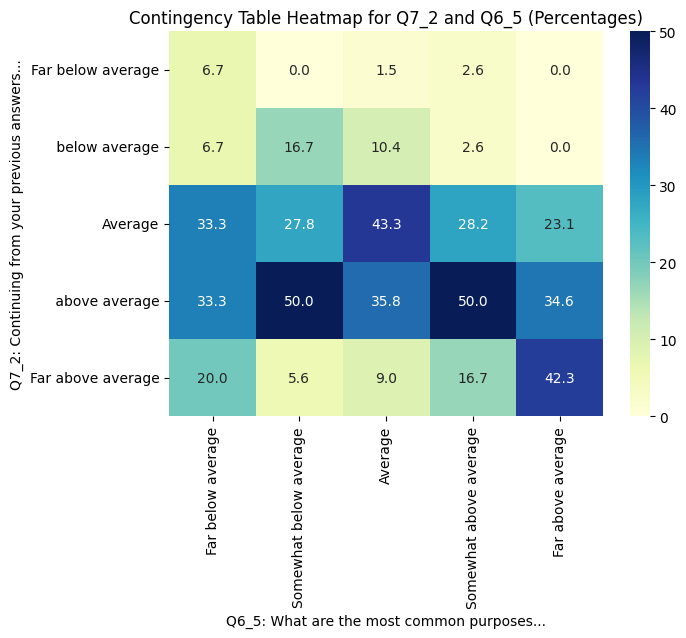

In [34]:
# Data from the new percentages table
data_percentages = {
    'Far below average': [6.7, 6.7, 33.3, 33.3, 20.0],
    'Somewhat below average': [0.0, 16.7, 27.8, 50.0, 5.6],
    'Average': [1.5, 10.4, 43.3, 35.8, 9.0],
    'Somewhat above average': [2.6, 2.6, 28.2, 50.0, 16.7],
    'Far above average': [0.0, 0.0, 23.1, 34.6, 42.3],
}

index_percentages = ['Far below average', ' below average', 'Average', ' above average', 'Far above average']
contingency_table_percentages = pd.DataFrame(data_percentages, index=index_percentages)

# Plotting the new heatmap for percentages
plt.figure(figsize=(7, 5))
sns.heatmap(contingency_table_percentages, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title("Contingency Table Heatmap for Q7_2 and Q6_5 (Percentages)")
plt.xlabel("Q6_5: What are the most common purposes...")
plt.ylabel("Q7_2: Continuing from your previous answers...")
plt.show()


In [75]:
# Count the number of entries for each 'Search Intent'
search_intent_counts = df['What chat objects satisfied your search intents when you used the search function?'].value_counts()

# Identify 'Search Intent' values that have 5 or more entries
valid_search_intents = search_intent_counts[search_intent_counts >= 15].index
valid_search_intents
# Filter the DataFrame to only include valid 'Search Intent'
# df_filtered = df[df['What was your search intent when issuing this query to search your historical chat?'].isin(valid_search_intents)]
# df_filtered
encoded_search_intent_table,valid_search_intents



(                           Original Search Intent Search Intent
 0                       Assigned tasks to members             A
 1                     Work / Social announcements             B
 2  Entities (e.g. People, Brands, places, Movies)             C
 3    Refresh memory about what was said/discussed             D
 4                                       Resources             E
 5                              Question-answering             F,
 Index(['Thread of conversation', 'Text messages.', 'A document',
        'Names of people or channels/groups mentioned in the chat.',
        'Specific keywords or phrases mentioned in the chat.', 'A URL link'],
       dtype='object', name='What chat objects satisfied your search intents when you used the search function?'))

In [76]:
# Count the number of entries for each 'Search Intent'
search_intent_counts = df['What was your search intent when issuing this query to search your historical chat?'].value_counts()

# Identify 'Search Intent' values that have 5 or more entries
valid_search_intents = search_intent_counts[search_intent_counts >= 2].index
valid_search_intents
# Filter the DataFrame to only include valid 'Search Intent'
# df_filtered = df[df['What was your search intent when issuing this query to search your historical chat?'].isin(valid_search_intents)]
# df_filtered
encoded_chat_object_table,valid_search_intents


(                                Original Chat Object  Chat Object
 0                             Thread of conversation            1
 1                                     Text messages.            2
 2                                         A document            3
 3  Specific keywords or phrases mentioned in the ...            4
 4  Names of people or channels/groups mentioned i...            5
 5                  Multimedia (e.g. images, videos).            6
 6                                         A URL link            7
 7  Nothing relevant. Then searched for meeting na...            8,
 Index(['Refresh memory about what was said/discussed', 'Resources',
        'Entities (e.g. People, Brands, places, Movies)',
        'Assigned tasks to members', 'Work / Social announcements',
        'Question-answering'],
       dtype='object', name='What was your search intent when issuing this query to search your historical chat?'))

In [10]:

encoded_chat_object_table

,Original Chat Object,Chat Object
0,Thread of conversation,1
1,Text messages.,2
2,A document,3
3,Specific keywords or phrases mentioned in the ...,4
4,Names of people or channels/groups mentioned i...,5
5,"Multimedia (e.g. images, videos).",6
6,A URL link,7
7,Nothing relevant. Then searched for meeting na...,8
